In [9]:
import numpy as np
from itertools import product
from lib import ent_heating_MPS,MPS,ent_cooling_MPS,ent_heating_statevec,ent_cooling_statevec

# Defining gates and simulation parameters

In [10]:
X = np.array([[0,1],[1,0]])
H = np.array([[1,1],[1,-1]]) / np.sqrt(2)
T = np.array([[1,0],[0,np.exp(1j * np.pi / 4)]])
S = np.array([[1,0],[0,1j]])
CNOT = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])

In [11]:
realizations = 100
steps_heat = 200
steps_cool = 200
nWires = 6
gate_sets = (
    (CNOT,H,X),
    (CNOT,H,S),
    (CNOT,H,T),
)
beta = 10

# saving entanglement entropies
ent = np.zeros(shape=(2,len(gate_sets),realizations,steps_heat+steps_cool+2,nWires-1))
"""
First dimension corresponds to two smulation methods: MPS and statevector.

Second dimension corresponds to the gate set.

Third dimension corresponds to the realizations.

Fourth dimension corresponds to the step number within a simulation.

Fifth dimension corresponds to the number of qubits in each subsystem of the bipartitle system split.
"""

# saving bond dimensions
chi = np.zeros(shape=(len(gate_sets),realizations,nWires))
"""
First dimension corresponds to the gate set.

Second dimension corresponds to the realizations.

Third dimension corresponds to the bond.
"""

'\nFirst dimension corresponds to the gate set.\n\nSecond dimension corresponds to the realizations.\n\nThird dimension corresponds to the bond.\n'

# Simulations

In [12]:
for iMethod,method in enumerate(("MPS","statevec")):
    for iGates,gate_set in enumerate(gate_sets):
        iR = 0
        while iR < realizations:
            try:
                if method == "MPS":
                    psi,return_dict_heat = ent_heating_MPS(nWires,gate_set,steps_heat,eps=0)
                    psi,return_dict_cool = ent_cooling_MPS(psi,gate_set,beta,steps_cool,eps=0)
                    chi[iGates,iR,:] = [S.shape[0] for S in psi.Ss]
                elif method == "statevec":
                    psi,return_dict_heat = ent_heating_statevec(nWires,gate_set,steps_heat,return_Svn=True)
                    psi,return_dict_cool = ent_cooling_statevec(psi,gate_set,beta,steps_cool)

                ent[iMethod,iGates,iR,:,:] = np.concatenate((return_dict_heat["Svn"],return_dict_cool["Svn"]))
                iR += 1
            except np.linalg.LinAlgError:
                print(f"    iR = {iR}: LinAlgError. Trying again.")
            if iR % 5 == 0: print("    iR = {} of {}".format(iR,realizations))
        print("Set {:3} of {} done.".format(len(gate_sets) * iMethod + iGates + 1,2 * len(gate_sets)))

    iR = 5 of 100
    iR = 10 of 100
    iR = 15 of 100
    iR = 20 of 100
    iR = 25 of 100
    iR = 30 of 100
    iR = 35 of 100
    iR = 40 of 100
    iR = 45 of 100
    iR = 50 of 100
    iR = 55 of 100
    iR = 60 of 100
    iR = 65 of 100
    iR = 70 of 100
    iR = 75 of 100
    iR = 80 of 100
    iR = 85 of 100
    iR = 90 of 100
    iR = 95 of 100
    iR = 100 of 100
Set   1 of 6 done.
    iR = 5 of 100
    iR = 10 of 100
    iR = 15 of 100
    iR = 20 of 100
    iR = 25 of 100
    iR = 30 of 100
    iR = 35 of 100
    iR = 40 of 100
    iR = 45 of 100
    iR = 50 of 100
    iR = 55 of 100
    iR = 60 of 100
    iR = 65 of 100
    iR = 70 of 100
    iR = 75 of 100
    iR = 80 of 100
    iR = 85 of 100
    iR = 90 of 100
    iR = 95 of 100
    iR = 100 of 100
Set   2 of 6 done.
    iR = 5 of 100
    iR = 10 of 100
    iR = 15 of 100
    iR = 20 of 100
    iR = 25 of 100
    iR = 30 of 100
    iR = 35 of 100
    iR = 40 of 100
    iR = 45 of 100
    iR = 50 of 100
    iR = 55 o

# Plotting

In [13]:
import matplotlib.pyplot as plt
# mpl cosmetics
from matplotlib.lines import lineMarkers
from matplotlib.colors import BASE_COLORS
import matplotlib.patches as mpatches
lineMarkers = tuple(lineMarkers.keys())
baseColors = tuple(BASE_COLORS.keys())

gate_set_labels = ("H+X+CNOT","H+T+CNOT","H+S+CNOT")
method_labels = ("MPS","statevec")

Plotting the thermalization of MPS- and statevector method.

Text(0.5, 0, '#step')

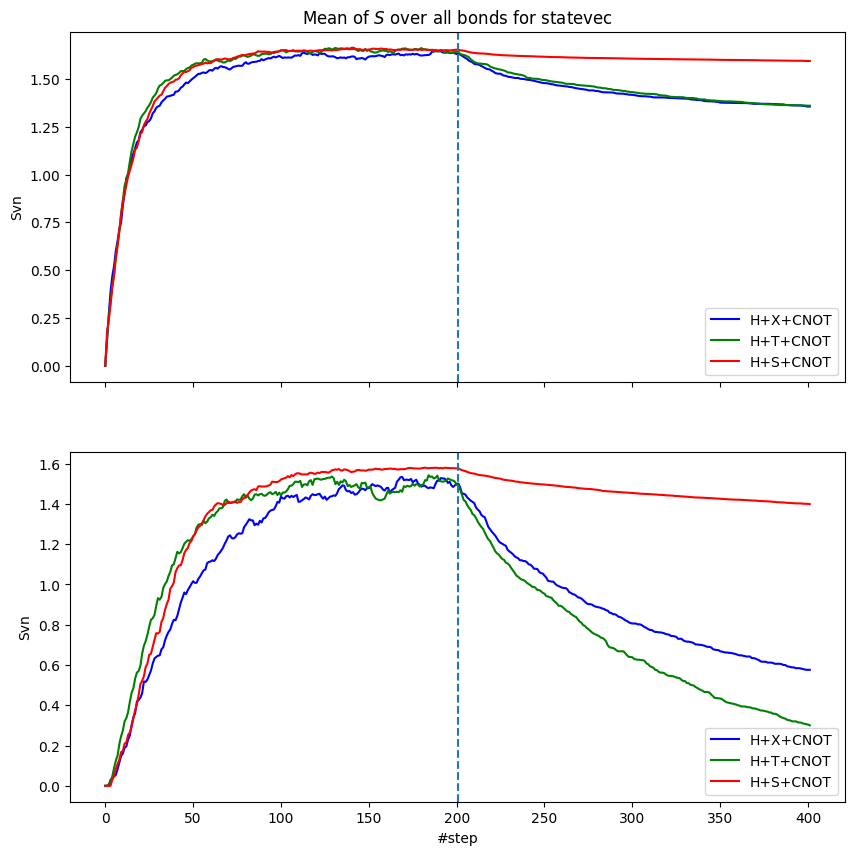

In [14]:
step_axis = np.arange(ent.shape[3])

fig_ent,ax_ent = plt.subplots(nrows=2,ncols=1,figsize=(10,10),sharex=True)
for iMethod in range(ent.shape[0]):
    for iGates in range(ent.shape[1]):
        ax_ent[iMethod].plot(step_axis,ent[iMethod,iGates,:,:,:].mean(axis=(0,2)),c=baseColors[iGates],label=gate_set_labels[iGates])
    ax_ent[iMethod].axvline(steps_heat+1,linestyle="--")
    ax_ent[iMethod].legend()
    ax_ent[iMethod].set_ylabel("Svn")
ax_ent[0].set_title("Mean of $S$ over all bonds for " + method_labels[iMethod])
ax_ent[1].set_xlabel("#step")

Bond dimensions for MPS

Text(0, 0.5, '$\\chi$')

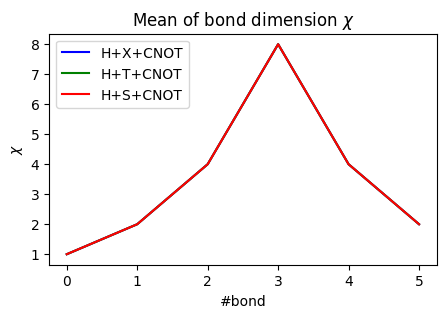

In [15]:
bond_axis = np.arange(nWires,dtype=int)

fig_chi,ax_chi = plt.subplots(nrows=1,ncols=1,figsize=(5,3))
for iGates in range(ent.shape[1]):
    ax_chi.plot(bond_axis,chi[iGates,:,:].mean(axis=(0,)),c=baseColors[iGates],label=gate_set_labels[iGates])
ax_chi.set_title("Mean of bond dimension $\chi$")
ax_chi.legend()
ax_chi.set_xlabel("#bond")
ax_chi.set_ylabel("$\chi$")

Text(0.5, 24.0, '#step')

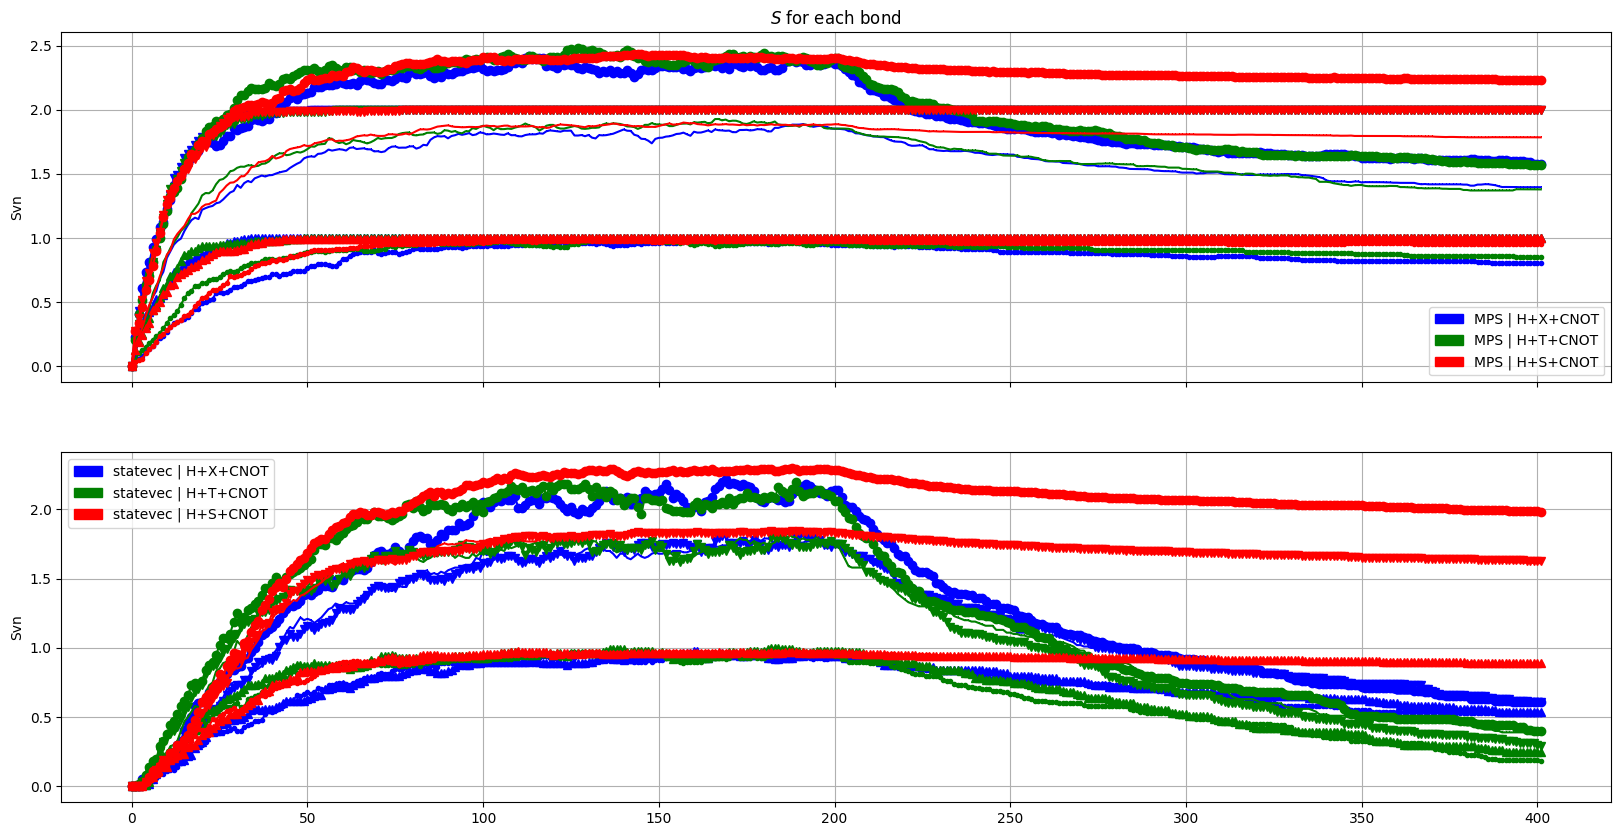

In [16]:
fig_ent_bond,ax_ent_bond = plt.subplots(nrows=2,ncols=1,figsize=(20,10),sharex=True)
for iMethod in range(ent.shape[0]):
    for iGates in range(ent.shape[1]):
        for iBond in range(nWires-1):
            ax_ent_bond[iMethod].plot(step_axis,ent[iMethod,iGates,:,:,iBond].mean(axis=(0,)),c=baseColors[iGates],marker=lineMarkers[iBond])
    ax_ent_bond[iMethod].legend(handles=[mpatches.Patch(color=baseColors[iGates],label=method_labels[iMethod] + " | " + gate_set_labels[iGates]) for iGates in range(ent.shape[1])])
    ax_ent_bond[iMethod].grid()
    ax_ent_bond[iMethod].set_ylabel("Svn")
ax_ent_bond[0].set_title("$S$ for each bond")
ax_ent[1].set_xlabel("#step")